Downloading the repository


In [24]:
### Q3
!pip install ucimlrepo
!pip install -U scikit-learn

Fetching the required dataset and placing them into dataframes X and Y

In [192]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
df = mushroom.data.original
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

Printing Complete DataFrame

In [193]:
df


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


Displaying sample of X

In [194]:
X.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Displaying sample of y

In [195]:
y.head()


,poisonous
0,p
1,e
2,e
3,p
4,e


Checking for Null values in the given dataframe


In [196]:
X.isnull().sum()


cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [197]:
y.isnull().sum()

poisonous    0
dtype: int64

Finding the number of types of y

In [198]:
y.value_counts()

poisonous
e            4208
p            3916
Name: count, dtype: int64

In [199]:
y['poisonous'] = y['poisonous'].replace({"p":1,"e":0})

<ipython-input-199-8b99cdae3305>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['poisonous'] = y['poisonous'].replace({"p":1,"e":0})


In [200]:
print(X.columns.values)

['cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor' 'gill-attachment'
 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape' 'stalk-root'
 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
 'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
 'habitat']


All columns of X and the different types and meanings assigned to them in dataset

In [201]:
  #['cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor' 'gill-attachment'
  #'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape' 'stalk-root'
  #'stalk-surface-above-ring' 'stalk-surface-below-ring'
  #'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
  #'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
  #'habitat']

  #bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
	#fibrous=f,grooves=g,scaly=y,smooth=s
  #brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
  #bruises=t,no=f
  #almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
  #attached=a,descending=d,free=f,notched=n
  #close=c,crowded=w,distant=d
  #broad=b,narrow=n
  #black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
  #enlarging=e,tapering=t
  #bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
  #fibrous=f,scaly=y,silky=k,smooth=s
  #fibrous=f,scaly=y,silky=k,smooth=s
  #brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
  #brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
  #partial=p,universal=u
  #brown=n,orange=o,white=w,yellow=y
  #none=n,one=o,two=t
  #cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
  #black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
  #abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
  #grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Mapping all the different types to a value for training and testing

In [202]:
mappings = {
    'cap-shape': {'b': 0, 'c': 1, 'x': 2, 'f': 3, 'k': 4, 's': 5},
    'cap-surface': {'f': 0, 'g': 1, 'y': 2, 's': 3},
    'cap-color': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9},
    'bruises': {'t': 0, 'f': 1},
    'odor': {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8},
    'gill-attachment': {'a': 0, 'd': 1, 'f': 2, 'n': 3},
    'gill-spacing': {'c': 0, 'w': 1, 'd': 2},
    'gill-size': {'b': 0, 'n': 1},
    'gill-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'g': 4, 'r': 5, 'o': 6, 'p': 7, 'u': 8, 'e': 9, 'w': 10, 'y': 11},
    'stalk-shape': {'e': 0, 't': 1},
    'stalk-root': {'b': 0, 'c': 1, 'u': 2, 'e': 3, 'z': 4, '?': 5},
    'stalk-surface-above-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3},
    'stalk-surface-below-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3},
    'stalk-color-above-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8},
    'stalk-color-below-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8},
    'veil-type': {'p': 0, 'u': 1},
    'veil-color': {'n': 0, 'o': 1, 'w': 2, 'y': 3},
    'ring-number': {'n': 0, 'o': 1, 't': 2},
    'ring-type': {'c': 0, 'e': 1, 'f': 2, 'l': 3, 'n': 4, 'p': 5, 's': 6, 'z': 7},
    'spore-print-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'r': 4, 'o': 5, 'u': 6, 'w': 7, 'y': 8},
    'population': {'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5},
    'habitat': {'g': 0, 'l': 1, 'm': 2, 'p': 3, 'u': 4, 'w': 5, 'd': 6}
}

for column, mapping in mappings.items():
    X[column] = X[column].map(mapping)

<ipython-input-202-e625595c0504>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].map(mapping)
<ipython-input-202-e625595c0504>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].map(mapping)
<ipython-input-202-e625595c0504>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [203]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,2,0,1,0,0,...,3,7,7,0,2,1,5,0,3,4
1,2,3,9,0,0,2,0,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,3,8,0,1,2,0,0,1,0,...,3,7,7,0,2,1,5,1,2,2
3,2,2,8,0,7,2,0,1,1,0,...,3,7,7,0,2,1,5,0,3,4
4,2,3,3,1,6,2,1,0,0,1,...,3,7,7,0,2,1,1,1,0,0


Checking the heatmap for columns to remove because of low correlation

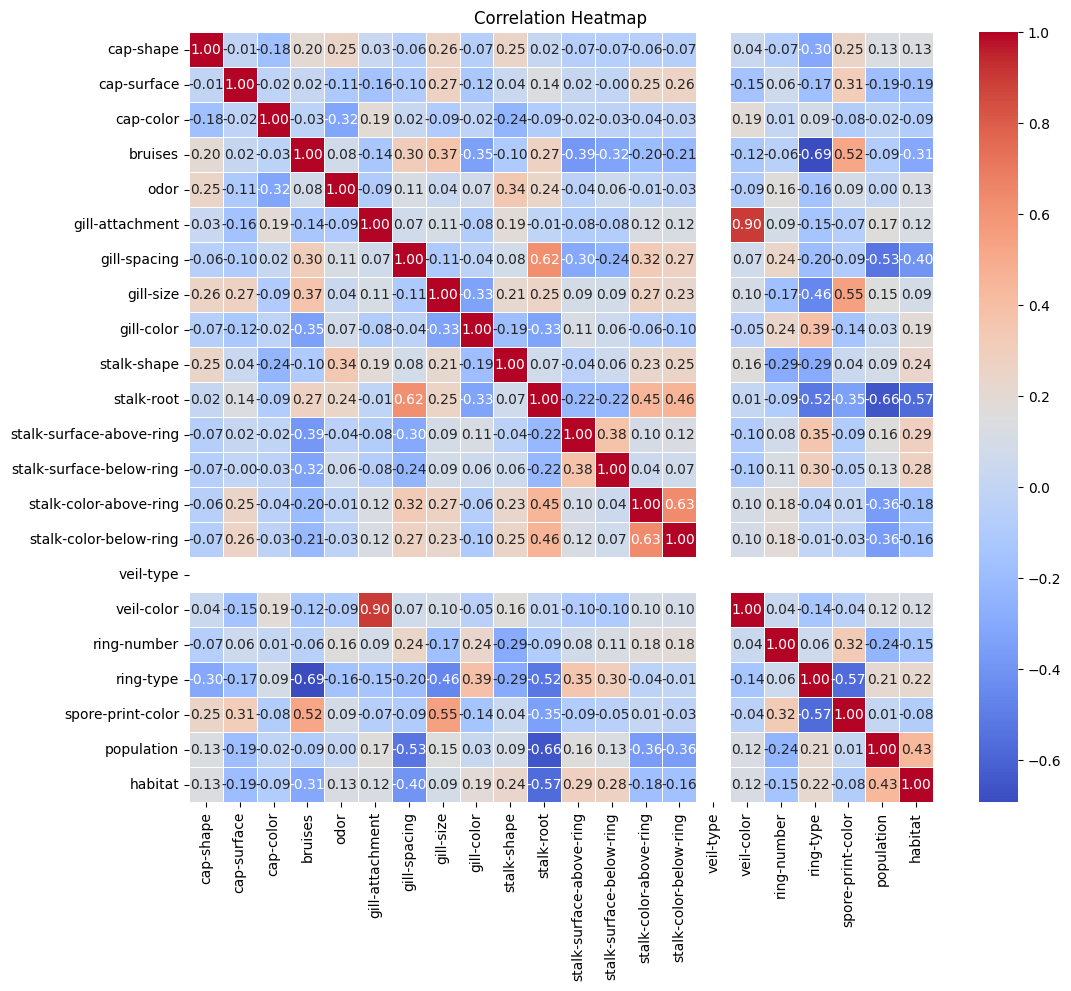

In [204]:
import seaborn as sns
corr_matrix = X.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

Filling the null values in the dataset with the appropriate type in stalk-root

In [208]:
X['stalk-root'].fillna(5,inplace =True)

<ipython-input-208-c12091d7ff9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['stalk-root'].fillna(5,inplace =True)


In [209]:
#X.drop(columns=['stalk-root'],inplace =True)

In [210]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Applying the training and testing for the different classifiers that are to be applied and plotting the roc curves for the ones that apply to it

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression Accuracy: 0.9569230769230769
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       843
           1       0.94      0.97      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



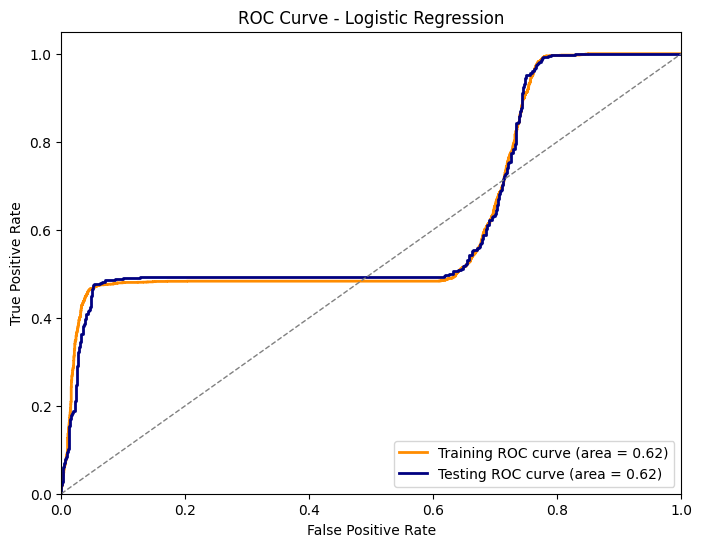

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron Accuracy: 0.9384615384615385
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       843
           1       0.91      0.96      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

MLP Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


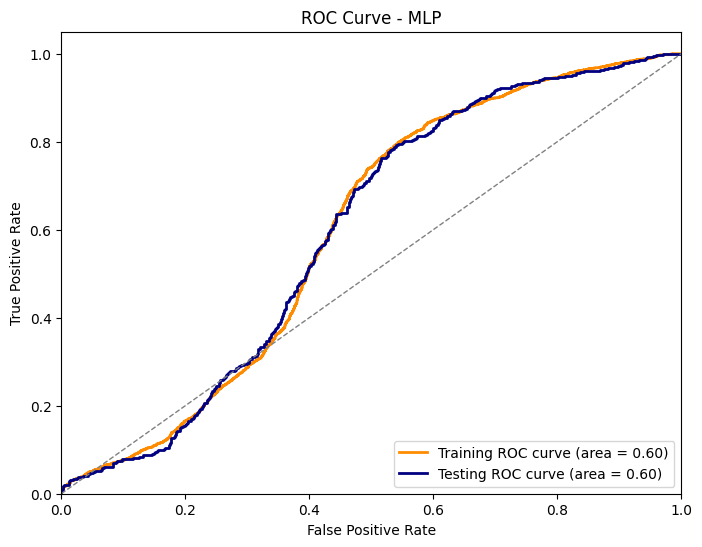

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


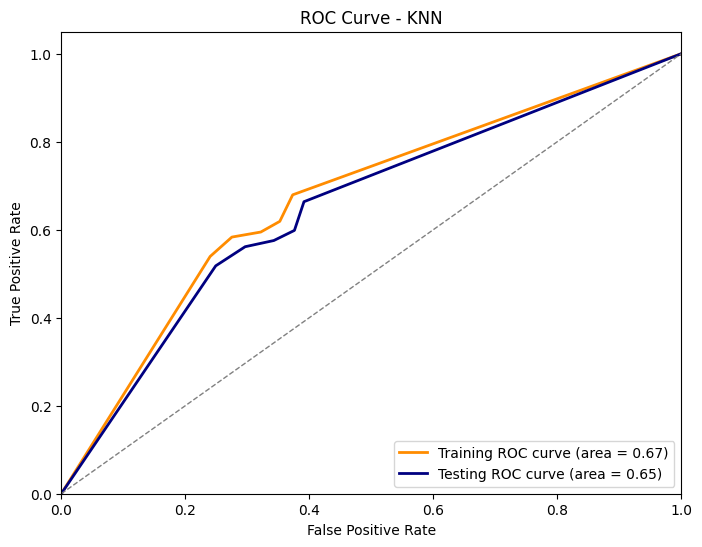

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Naive Bayes Accuracy: 0.8886153846153846
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       843
           1       0.89      0.88      0.88       782

    accuracy                           0.89      1625
   macro avg       0.89      0.89      0.89      1625
weighted avg       0.89      0.89      0.89      1625



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


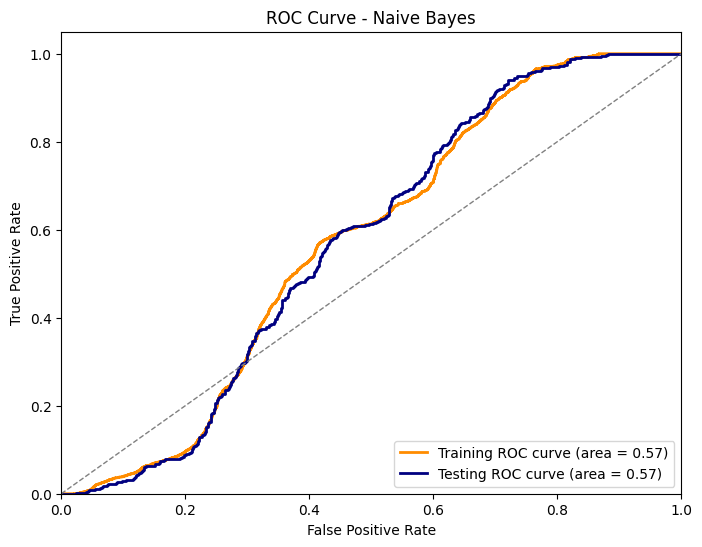

Best Model: MLP with accuracy: 1.0


In [212]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Perceptron": Perceptron(),
    "MLP": MLPClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

from sklearn.metrics import roc_curve, auc

# Define a function to plot ROC curves
def plot_roc_curve(model, X_train, y_train, X_test, y_test, model_name):
    plt.figure(figsize=(8, 6))

    # Training set
    y_train_pred = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.2f})')

    # Testing set
    y_test_pred = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, color='navy', lw=2, label=f'Testing ROC curve (area = {roc_auc_test:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    if name not in ['Perceptron','SVM']:
      plot_roc_curve(clf, X_train, y_train, X_test, y_test, name)

# Select the best performing model
best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with accuracy: {results[best_model]}")



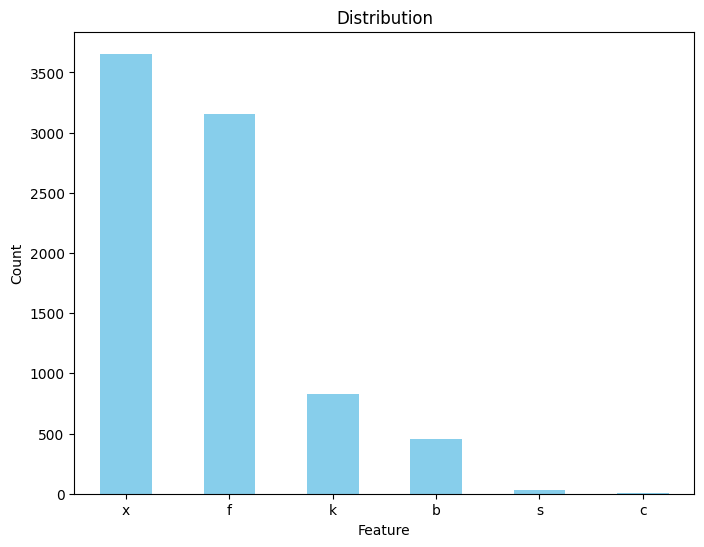

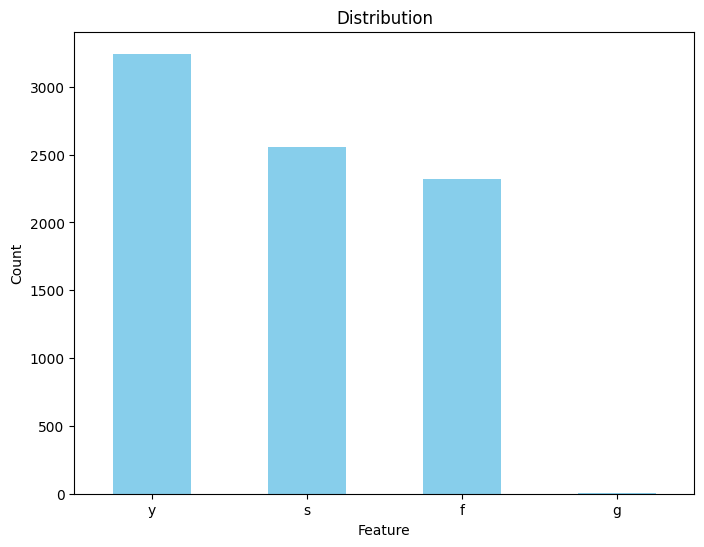

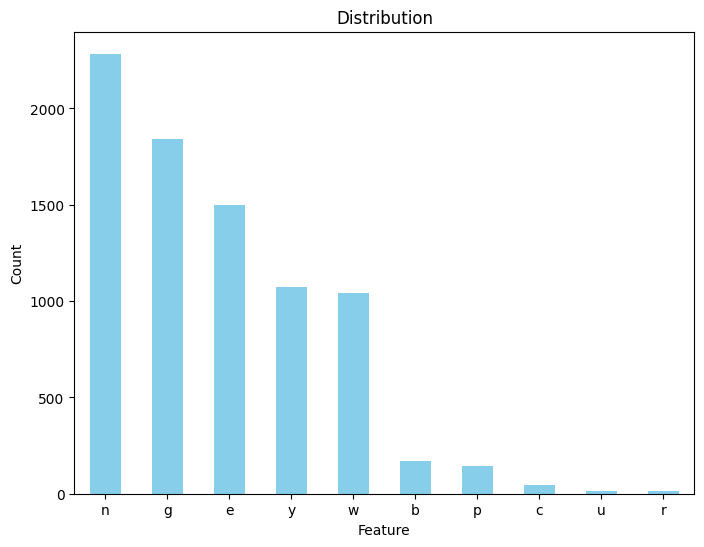

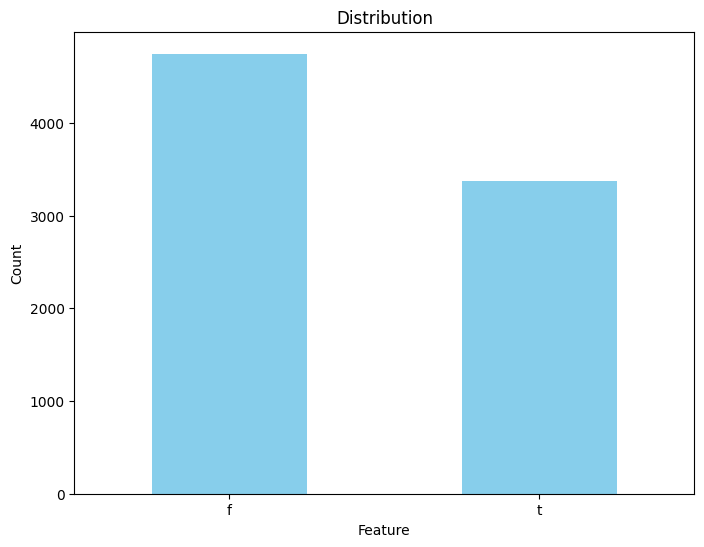

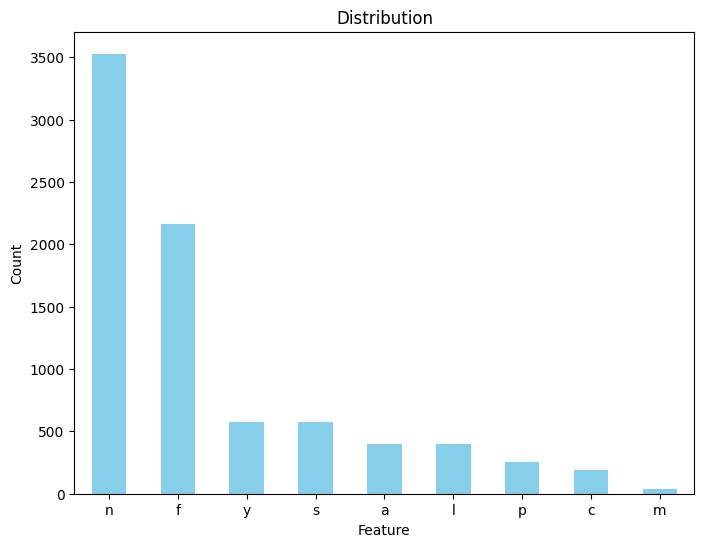

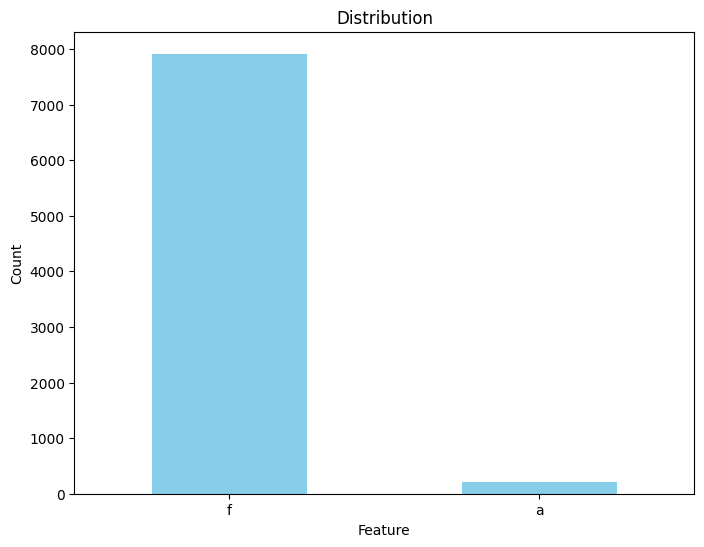

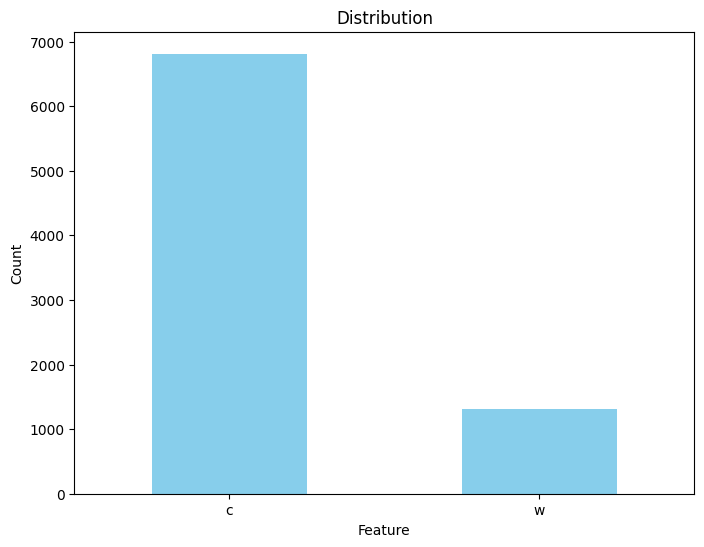

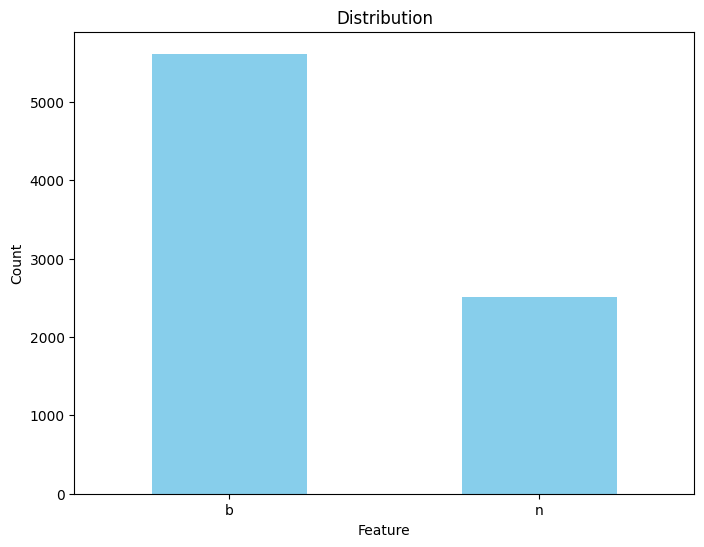

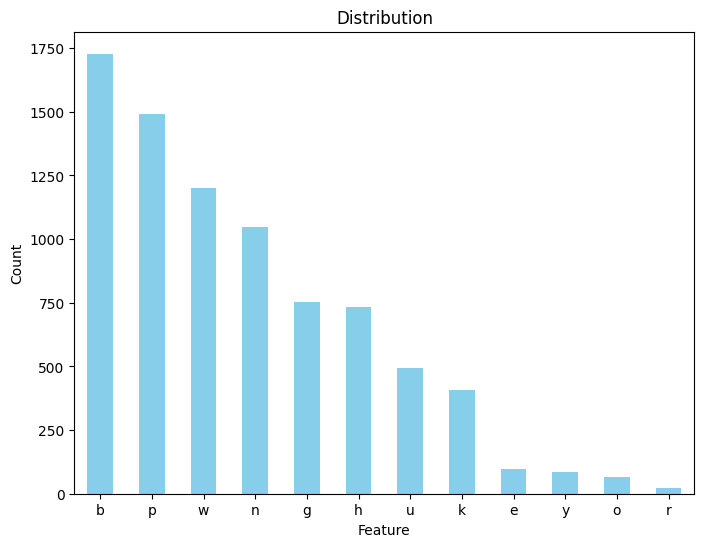

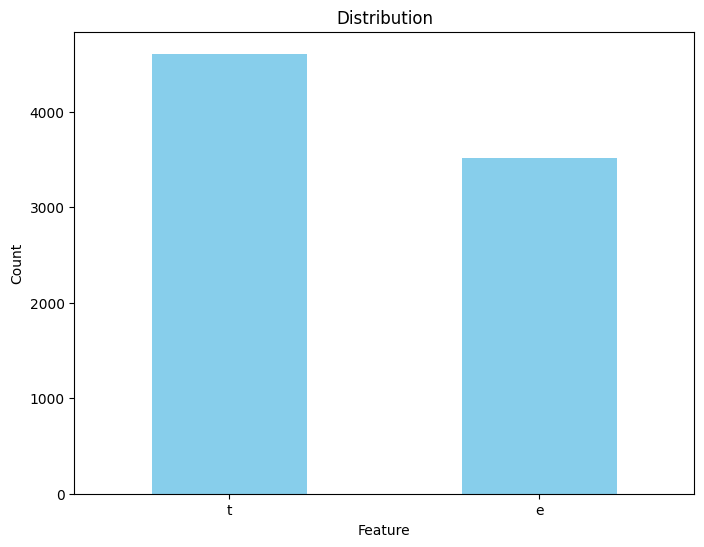

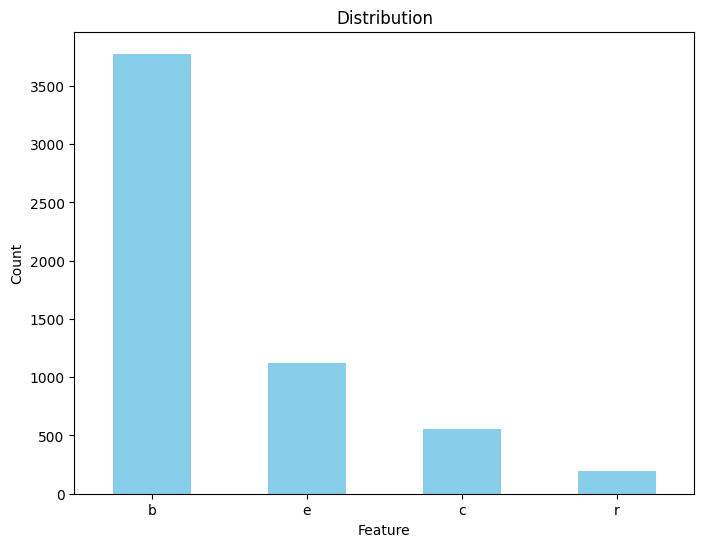

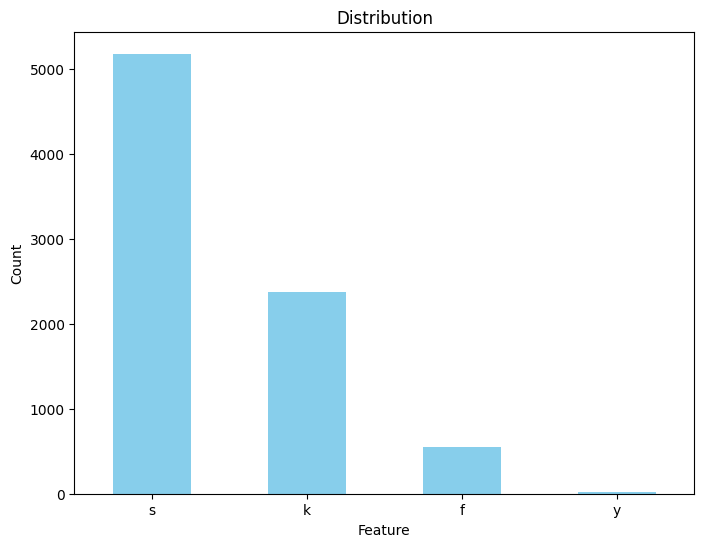

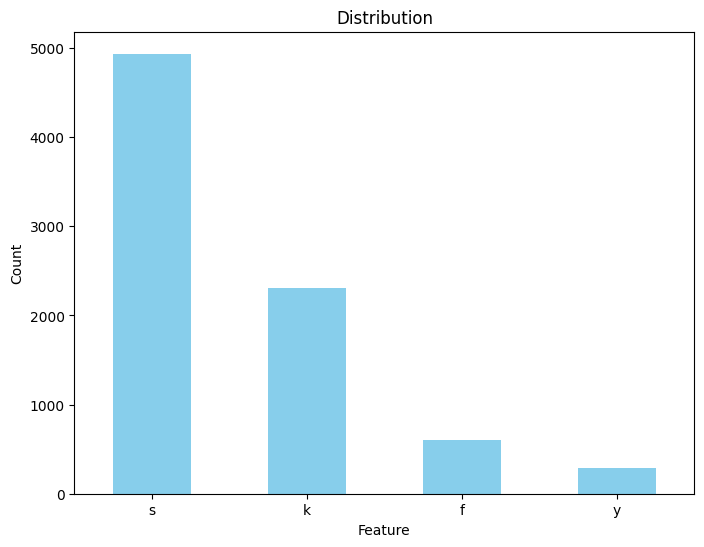

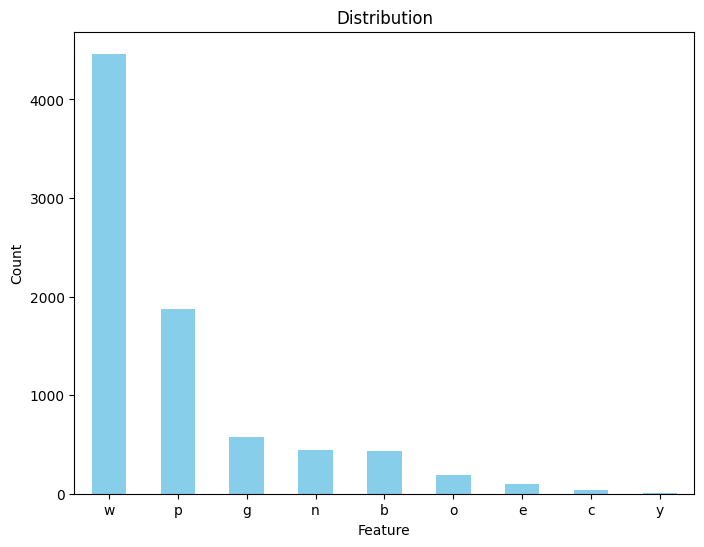

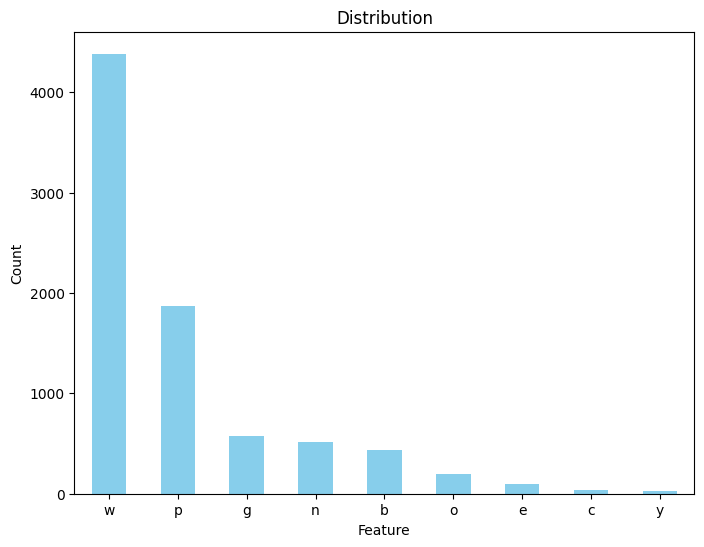

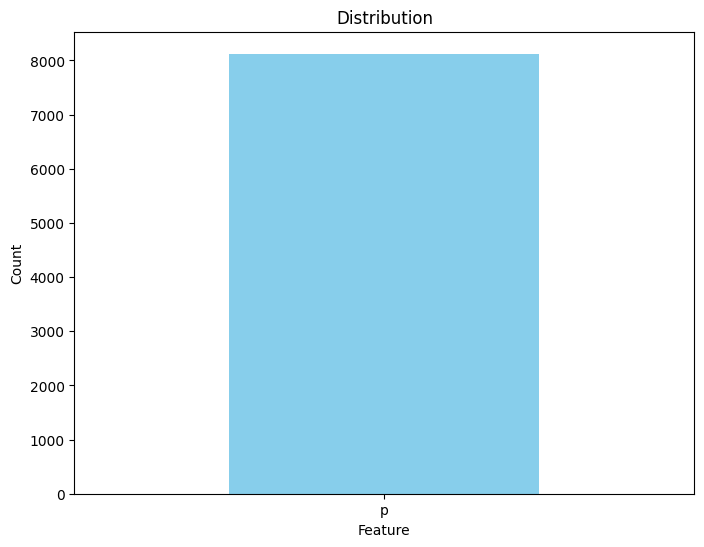

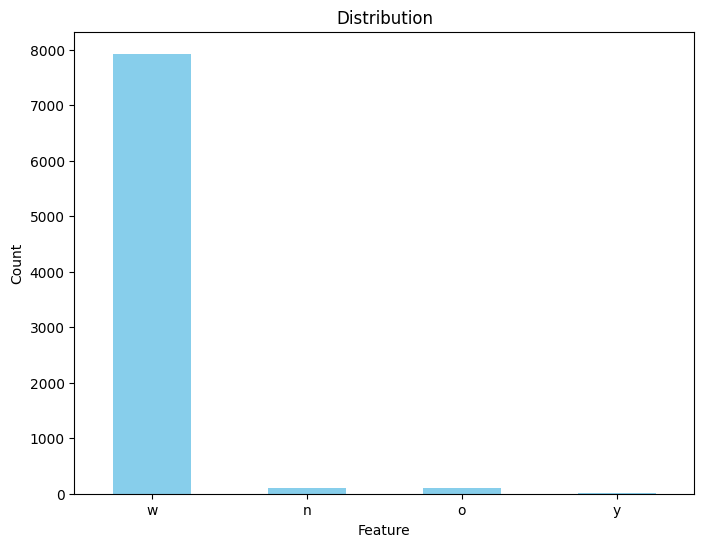

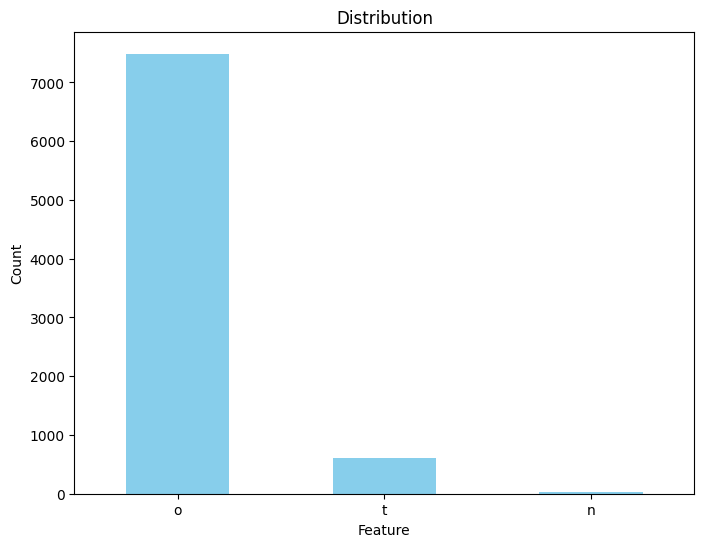

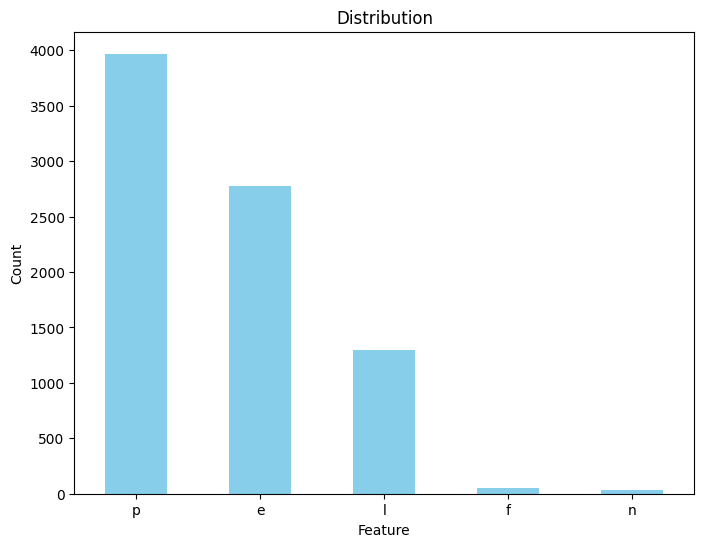

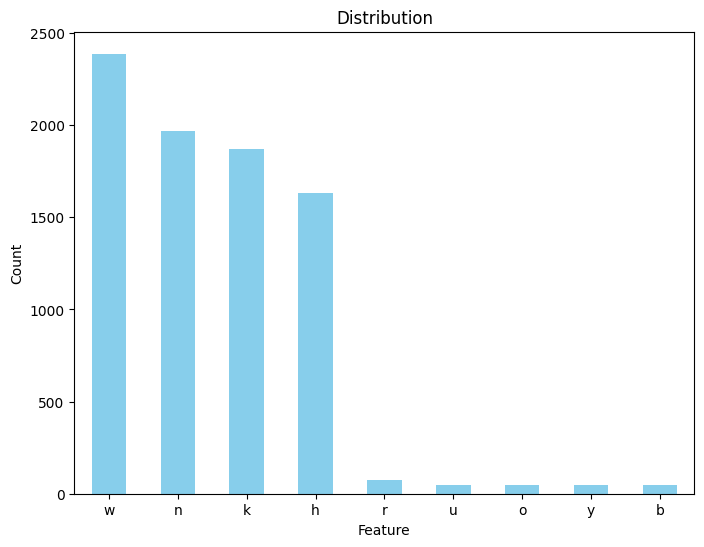

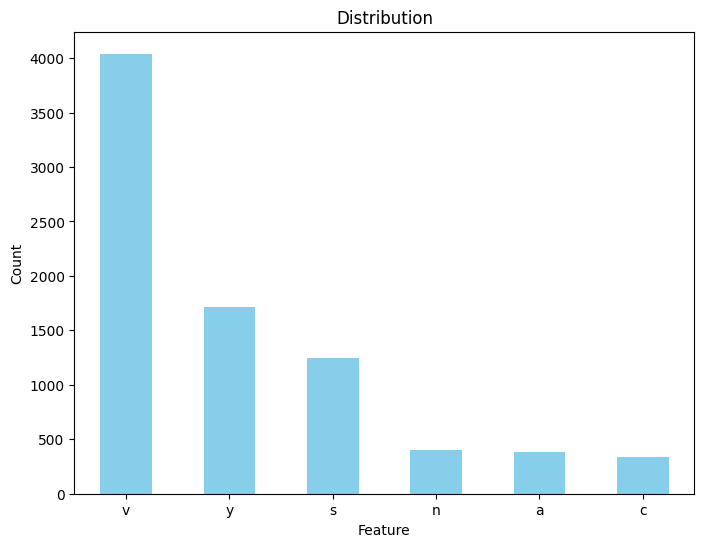

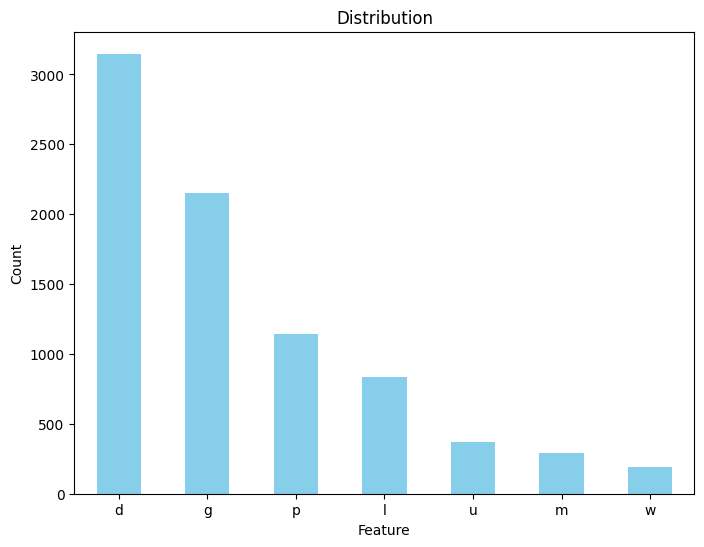

In [213]:
import matplotlib.pyplot as plt
P = X.columns.values

for i in range(0,22):
  plt.figure(figsize=(8, 6))
  df[P[i]].value_counts().plot(kind='bar', color='skyblue')
  plt.title('Distribution')
  plt.xlabel('Feature')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.show()


In [215]:
from sklearn.cluster import KMeans

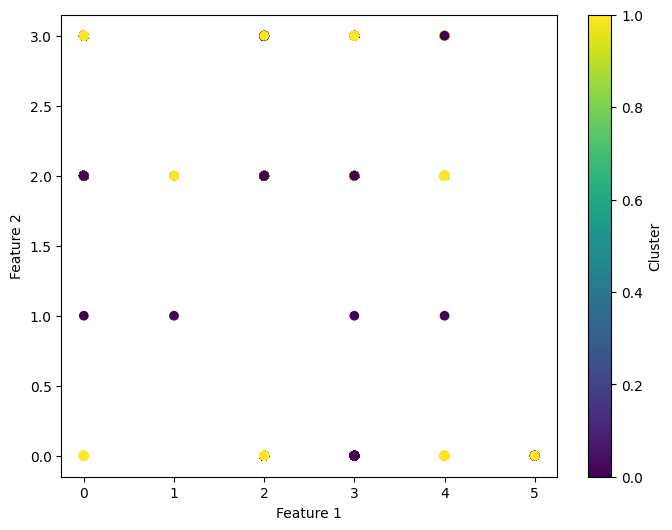

In [223]:
X = mushroom.data.features
num_clusters=2
# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


So, based on the mapping and the classification, the accuracy of all the models has been calculated and plotted on the roc curve.

The following models gave and accuracy of 100%:


*   MLP
*   KNN
*   SVM

This is after the mapping and the NaN values were replaced as "?" or missing as per the mentioned types.




